# Suporte para o desafio 2

## Importando base de dados

In [25]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel(
    '/home/gbrlmoraes/git_reps/FIAP_PBLs__2024_2/PBL_fase_5/dados/vendas_linha_petshop_2020_2024.xlsx'
)
df.head()

,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod
0,50284,Norte,Biscoito True Champion 300g,24.64,2,49.28,2020-03-12,Acre,Cartão Crédito,Rapid Pink,Carlos,1.76,26.4,Alimentação
1,50285,Norte,Biscoito True Champion 300g,23.52,2,47.04,2020-04-10,Amapá,Cartão Crédito,Rapid Pink,Maria Linda,1.68,25.2,Alimentação
2,50286,Norte,Biscoito True Champion 300g,24.64,4,98.56,2020-08-07,Pará,Dinheiro,Rapid Pink,Julia,3.52,52.8,Alimentação
3,50287,Norte,Biscoito True Champion 300g,21.28,4,85.12,2020-01-10,Rondônia,Pix,Rapid Pink,Yuri,3.04,45.6,Alimentação
4,50288,Norte,Biscoito True Champion 300g,24.64,NaN,49.28,2020-04-11,Tocantins,Cartão Crédito,Rapid Pink,Dolores,1.76,26.4,Alimentação


## Tratando colunas numéricas

In [3]:
def converte_pra_numero(valor):
    try:
        return float(valor)
    except: 
        return None

In [4]:
for coluna in ['valor', 'quantidade', 'valor_total_bruto', 'valor_comissao', 'lucro_liquido']:
    df[coluna] = df[coluna].apply(converte_pra_numero).astype(float)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250059 entries, 0 to 250058
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   cod_pedido           250059 non-null  int64         
 1   regiao_pais          250059 non-null  object        
 2   produto              250059 non-null  object        
 3   valor                250058 non-null  float64       
 4   quantidade           249560 non-null  float64       
 5   valor_total_bruto    250038 non-null  float64       
 6   data                 250059 non-null  datetime64[ns]
 7   estado               250059 non-null  object        
 8   formapagto           250059 non-null  object        
 9   centro_distribuicao  250059 non-null  object        
 10  responsavelpedido    250059 non-null  object        
 11  valor_comissao       250038 non-null  float64       
 12  lucro_liquido        250038 non-null  float64       
 13  categoriaprod 

## Identificando outliers

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

def super_boxplot(dataframe, nome_coluna):

    coluna = dataframe[nome_coluna]
    
    # Calcula os quartis e o intervalo interquartil
    Q1 = coluna.quantile(0.25)
    Q3 = coluna.quantile(0.75)
    IQR = Q3 - Q1
    
    # Calcula os limites para detectar outliers
    limite_inf = Q1 - 1.5 * IQR
    limite_sup = Q3 + 1.5 * IQR
    
    # Detecta os outliers inferiores e superiores
    outliers_inf = coluna[coluna < limite_inf]
    outliers_sup = coluna[coluna > limite_sup]
    
    # Conta o número de outliers
    num_outliers_inf = len(outliers_inf)
    num_outliers_sup = len(outliers_sup)
    total_outliers = num_outliers_inf + num_outliers_sup

    # Imprime o número de outliers
    print(f'Número de outliers inferiores: {num_outliers_inf}, considerando um valor limite de {limite_inf}')
    print(f'Número de outliers superiores: {num_outliers_sup}, considerando um valor limite de {limite_sup}')
    print(f'Total de outliers: {total_outliers}')
    
    # Cria o gráfico boxplot horizontal
    plt.figure(figsize=(6, 4))
    sns.boxplot(
        x = nome_coluna,
        data = df
    )
    plt.title(f'Boxplot dos valores de {nome_coluna}', fontsize = 12)
    plt.grid(True)
    plt.show()

In [9]:
df[['valor', 'quantidade', 'valor_total_bruto', 'valor_comissao', 'lucro_liquido']].describe()

,valor,quantidade,valor_total_bruto,valor_comissao,lucro_liquido
count,250058.000000,249560.000000,250038.000000,250038.000000,250038.000000
mean,97.791114,3.576491,380.915749,14.385344,146.921062
std,190.639091,11.652324,5253.065536,204.275255,2223.081631
min,-9887.000000,-1000.000000,-193700.000000,-3115.350000,-49845.600000
25%,24.000000,1.000000,39.000000,0.780000,18.000000
50%,38.570000,2.000000,75.040000,1.690000,33.600000
75%,74.000000,3.000000,148.000000,4.360000,77.380000
max,2500.000000,1000.000000,879789.000000,31741.710000,454053.600000


Número de outliers inferiores: 6, considerando um valor limite de -51.0
Número de outliers superiores: 31075, considerando um valor limite de 149.0
Total de outliers: 31081


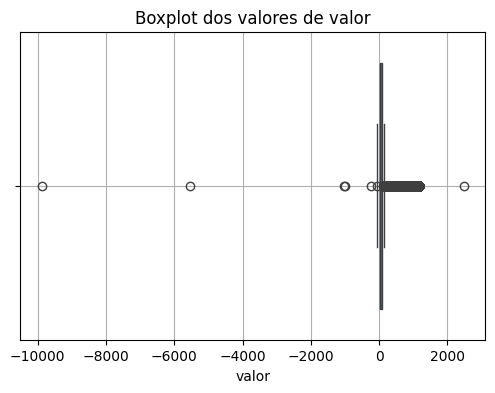

In [50]:
super_boxplot(df, 'valor')

Número de outliers inferiores: 43, considerando um valor limite de -2.0
Número de outliers superiores: 4657, considerando um valor limite de 6.0
Total de outliers: 4700


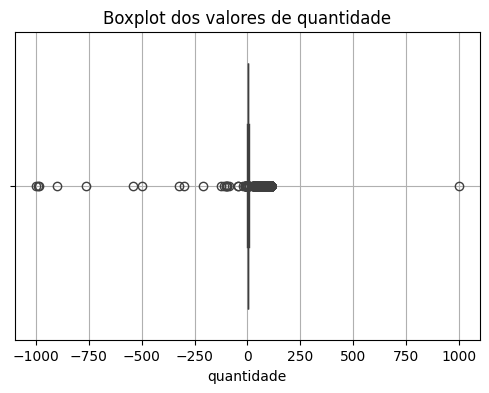

In [51]:
super_boxplot(df, 'quantidade')

Número de outliers inferiores: 48, considerando um valor limite de -124.5
Número de outliers superiores: 36448, considerando um valor limite de 311.5
Total de outliers: 36496


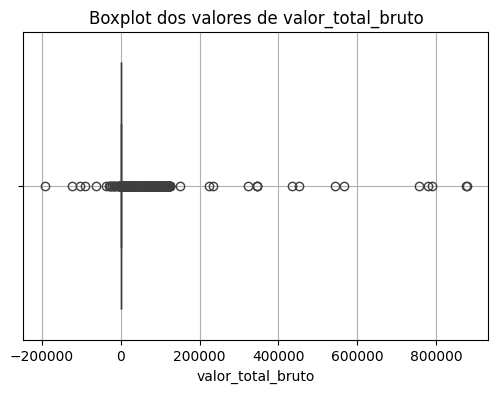

In [52]:
super_boxplot(df, 'valor_total_bruto')

Número de outliers inferiores: 23, considerando um valor limite de -4.59
Número de outliers superiores: 33787, considerando um valor limite de 9.73
Total de outliers: 33810


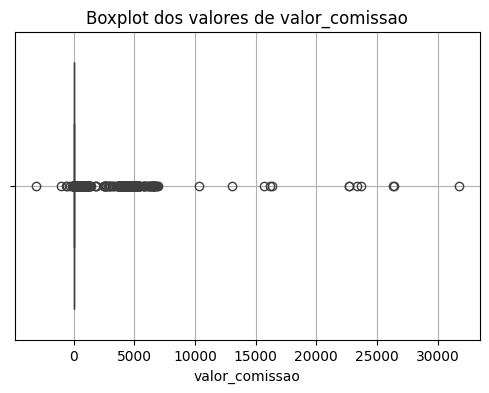

In [53]:
super_boxplot(df, 'valor_comissao')

Número de outliers inferiores: 22, considerando um valor limite de -71.07
Número de outliers superiores: 33320, considerando um valor limite de 166.45
Total de outliers: 33342


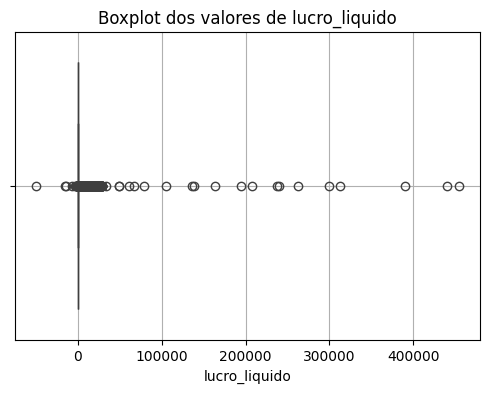

In [54]:
super_boxplot(df, 'lucro_liquido')